# **Air Quality Index:  Classification Models**

Performed by:


1.   Rahul Mallya - PES1UG20CS318
2.   Rohit Roshan - PES1UG20CS355
3.   Rohith Reddy - PES1UG20CS354

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
dataset=pd.read_csv('/work/cleandata.csv',encoding="ISO-8859-1")

In [ ]:
dataset.head()

,Unnamed: 0,state,location,type,so2,no2,rspm,spm,pm2_5,date,si,ni,rpi,spi,pmi,AQI,year,AQI_Range
0,0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,78.182824,200.260378,0.0,1990-02-01,6.000,21.750,97.72853,166.840252,0.0,166.840252,1990,Poor
1,1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,78.182824,200.260378,0.0,1990-02-01,3.875,8.750,97.72853,166.840252,0.0,166.840252,1990,Poor
2,2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,78.182824,200.260378,0.0,1990-02-01,7.750,35.625,97.72853,166.840252,0.0,166.840252,1990,Poor
3,3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,78.182824,200.260378,0.0,1990-03-01,7.875,18.375,97.72853,166.840252,0.0,166.840252,1990,Poor
4,4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,78.182824,200.260378,0.0,1990-03-01,5.875,9.375,97.72853,166.840252,0.0,166.840252,1990,Poor


### Decision Tree Classifier

In [ ]:
X2 = dataset[['si','ni','rpi','spi']]
Y2 = dataset['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data 

In [ ]:
#fit the model on train data 
DT2 = DecisionTreeClassifier(max_depth=3).fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  0.9761664988251091
Model accuracy on test is:  0.9753395506039932
--------------------------------------------------
KappaScore is:  0.9579890612908531


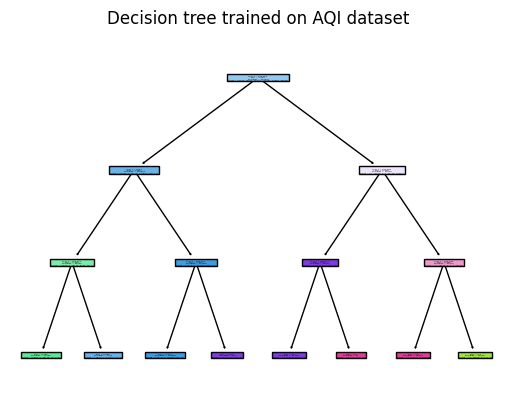

In [ ]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(DT2, filled=True)
plt.title("Decision tree trained on AQI dataset")
plt.show()

### Random Forest Classifier

In [ ]:
#fit the model on train data 
RF=RandomForestClassifier(max_depth=3).fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  0.9479656918154976
Model accuracy on test is:  0.9471323360664288
--------------------------------------------------
KappaScore is:  0.9096032128648528


In [ ]:

# Export as dot file
estimator = RF.estimators_[5]
export_graphviz(estimator, 
                out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

### K-Nearest Neighbours

In [ ]:
#fit the model on train data 
KNN = KNeighborsClassifier(n_neighbors=7).fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9960677120797967
Model accuracy on test is:  0.9938175015473633
--------------------------------------------------
KappaScore is:  0.9895383071480979


### To find parameters for KNN,

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train2, Y_train2)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
print(gridsearch.best_params_)

{'n_neighbors': 7}


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6920ec3-e3dd-466f-8f01-821cfb33c0ba' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>